# Heart Disease Prediction

### Introduction

One of the most exciting applications of Artificial Intelligence today is in the Healthcare industry. The potentialities are significant, but there is one big problem. That is the insufficient number of people with both technical skills and domain expertise. Understanding the different features is key for building a good predictive model and it is not an easy task.
In this project I will be using a dataset from <b>kaggle.com</b> , that contains data of 303 patients with 13 different features plus a target variable(1 for the patients with, and 0 for the ones without a heart disease).

In this project I will build 5 different supervised learning algorithms for classification and compare their results to determine which one is the best. After that I will make an unsupervised learning algorithm for clustering all the patients with a heart disease. 

Let`s take a closer look at the features and describe their meaning, as some of their headers are not straghtforward.

* <b>age</b> - Age of the patient in years.
* <b>sex</b> - 1 for male, 0 for female patients
* <b>cp</b> - Chest pain type (0:typical angina(a decrease in the blood supply of the heart), 1:atypical angina(chest pain, not related to the heart, 2:non-anginal pain(esophageal spasms, not related to the heart), 3:asymptomatic pain(chest pain, without signs of a particular disease)
* <b>trtbps</b> - Resting blood pressure of the patient at the time of admission in the hospital, measured in mm Hg(millimeters of mercury), anything above 130-140 is concerning.
* <b>chol</b> - Cholesterol measurement of the patient in mg/dl(milligrams per decilitre)
* <b>fbs</b> - Fasting blood sugar(1 if > 120mg/dl, 0 if not), a value that is above 126 mg/dL is considered a sign of diabetes.
* <b>restecg</b> - Resting electrocardiographic measurment(0 = normal, 1 = ST-T wave abnormality, 2 = Probable or definite left ventricular hypertrophy by Estes' criteria)
* <b>thalachh</b> - Maximum heart rate examined
* <b>exng</b> - Excercise induced angina(1 = Yes, 0 = No)
* <b>oldpeak</b> - ST depression induced by exercise, relative to rest, looks at the stress of the heart. During excercise, unhealthy hearts will stress more.
* <b>slp</b> - The slope of the peak exercise ST segment(0:upslope(а very rare case, in which the observed heart rate is better during the excersise) , 1:flat(a minimal change in the slope, indicates a typical healthy heart), 2:downslope(sign of an unhealthy heart)
* <b>caa</b> - Number of major vessels
* <b>thall</b> - A blood disorder called "thalassemia"


In [1]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
%matplotlib inline 

In [2]:
heart_data = pd.read_csv('C:\\Users\\Petar\\Desktop\\Heart disease prediction\\heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

Changing the names of the columns, so that they dont look that confusing.

In [5]:
heart_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels_count', 'thalassemia', 'target']

In [6]:
heart_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis(EDA)

In [7]:
heart_data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
major_vessels_count        0
thalassemia                0
target                     0
dtype: int64

In [8]:
heart_data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_data.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Next I will calculate the Pearson correlation coefficient and the P-value between all features and the target variable. I will draw conclusions based on the convention that when the 
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [10]:
pearson_coef, p_value = stats.pearsonr(heart_data['age'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.22543871587483727  with a P-value of P = 7.524801303442636e-05


<h5>Conclusion:</h5>
There is moderate evidence that the correlation is statistically significant.

In [11]:
pearson_coef, p_value = stats.pearsonr(heart_data['sex'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.28093657550176704  with a P-value of P = 6.678692115314504e-07


<h5>Conclusion:</h5>
There is strong evidence that the correlation is statistically significant.

In [12]:
pearson_coef, p_value = stats.pearsonr(heart_data['chest_pain_type'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4337982615068943  with a P-value of P = 2.469712108922634e-15


<h5>Conclusion:</h5>
There is a strong evidence that the correlation of chest pain type and the target variable is statistically significant, although the linear relationship isn't extremely strong(~0.43).

In [13]:
pearson_coef, p_value = stats.pearsonr(heart_data['resting_blood_pressure'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.14493112849775155  with a P-value of P = 0.01154605920023369


<h5>Conclusion:</h5>
There is a strong evidence that the correlation of resting blood pressure and the target variable is statistically significant, but the linear relationship between them is very weak.

In [14]:
pearson_coef, p_value = stats.pearsonr(heart_data['cholesterol'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0852391051375691  with a P-value of P = 0.13879032695601176


<h5>Conclusion:</h5>
There is no evidence that the correlation is significant, and the linear relationship between the variables is very weak.

In [15]:
pearson_coef, p_value = stats.pearsonr(heart_data['fasting_blood_sugar'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.02804576027271281  with a P-value of P = 0.6267775474340881


<h5>Conclusion:</h5>
There is no evidence that the correlation is significant, and the linear relationship between the variables is very weak.

In [16]:
pearson_coef, p_value = stats.pearsonr(heart_data['rest_ecg'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.13722950287377303  with a P-value of P = 0.016839897060127305


<h5>Conclusion:</h5>
There is a weak evidence that the correlation is significant, and the linear relationship between the variables is very weak.

In [17]:
pearson_coef, p_value = stats.pearsonr(heart_data['max_heart_rate_achieved'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.42174093381067457  with a P-value of P = 1.6973376386561237e-14


<h5>Conclusion:</h5>
There is a strong evidence that the correlation is significant, the linear relationship between the variables is not very strong, but in that case it might be useful.

In [18]:
pearson_coef, p_value = stats.pearsonr(heart_data['exercise_induced_angina'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.43675708335330315  with a P-value of P = 1.5208138383314634e-15


<h5>Conclusion:</h5>
There is a strong evidence that the correlation is significant, the linear relationship between the variables is not very strong, but in that case it might be useful.

In [19]:
pearson_coef, p_value = stats.pearsonr(heart_data['st_depression'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.43069600168736866  with a P-value of P = 4.085346391354741e-15


<h5>Conclusion:</h5>
There is a strong evidence that the correlation is significant, the linear relationship between the variables is not strong, but in that case it might be useful.

In [20]:
pearson_coef, p_value = stats.pearsonr(heart_data['st_slope'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3458770782417248  with a P-value of P = 6.101610619564961e-10


<h5>Conclusion:</h5>
There is a strong evidence that the correlation is significant, the linear relationship between the variables is weak.

In [21]:
pearson_coef, p_value = stats.pearsonr(heart_data['major_vessels_count'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.39172399235125266  with a P-value of P = 1.4915387381121173e-12


<h5>Conclusion:</h5>
There is a strong evidence that the correlation is significant, with weak negative linear relationship.

In [22]:
pearson_coef, p_value = stats.pearsonr(heart_data['thalassemia'], heart_data['target'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.34402926803831  with a P-value of P = 7.624879909572273e-10


<h5>Conclusion:</h5>
There is a strong evidence that the correlation is significant, with weak negative linear relationship.

It looks like age, chest pain type, max heart rate achieved, excercise induced angina, st depression, st slope, major vessels count and thalassemia will be the most suitable predictors in this dataset. 
Lets try to get a better sense of the data with some visualizations.

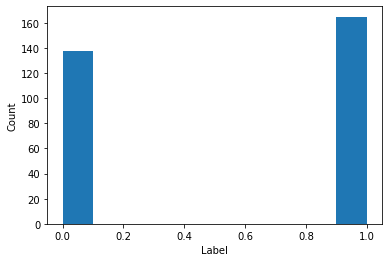

In [23]:
plt.hist(heart_data['target'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

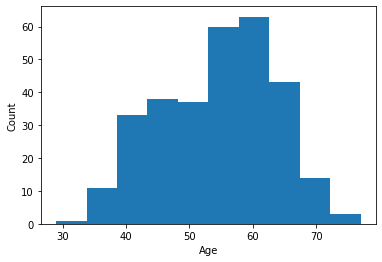

In [24]:
plt.hist(heart_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

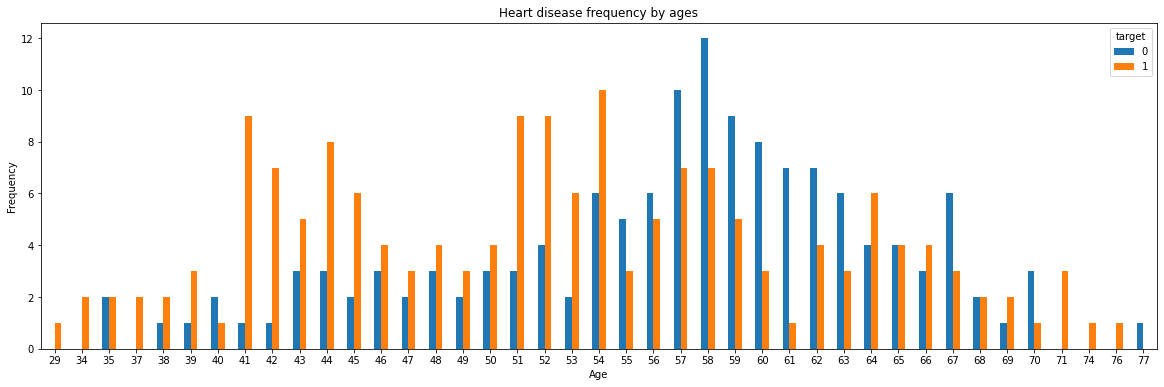

In [25]:
pd.crosstab(heart_data.age, heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart disease frequency by ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

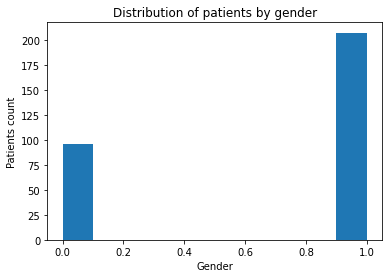

In [26]:
plt.hist(heart_data['sex'])
plt.xlabel('Gender')
plt.ylabel('Patients count')
plt.title('Distribution of patients by gender')
plt.show()

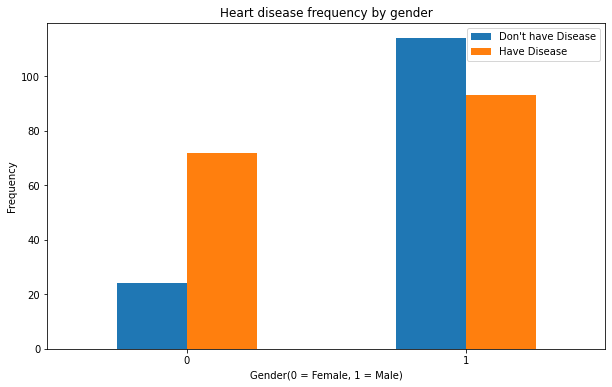

In [27]:
pd.crosstab(heart_data.sex, heart_data.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency by gender')
plt.xlabel('Gender(0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation = 0)
plt.show()

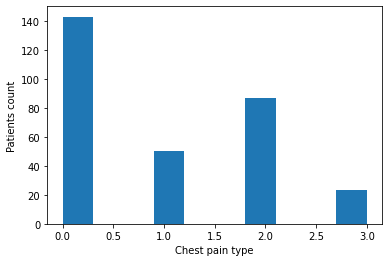

In [28]:
plt.hist(heart_data['chest_pain_type'])
plt.xlabel('Chest pain type')
plt.ylabel('Patients count')
plt.show()

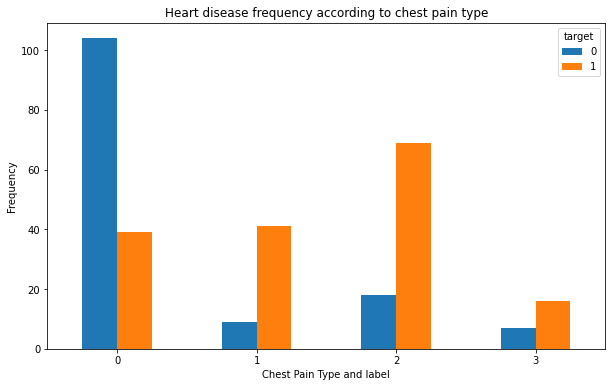

In [29]:
pd.crosstab(heart_data.chest_pain_type, heart_data.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency according to chest pain type')
plt.xlabel('Chest Pain Type and label')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

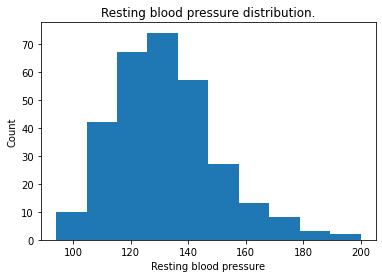

In [30]:
plt.hist(heart_data['resting_blood_pressure'])
plt.xlabel('Resting blood pressure')
plt.ylabel('Count')
plt.title('Resting blood pressure distribution.')
plt.show()

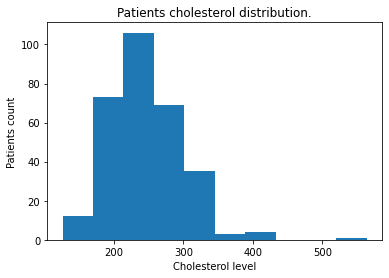

In [31]:
plt.hist(heart_data['cholesterol'])
plt.xlabel('Cholesterol level')
plt.ylabel('Patients count')
plt.title('Patients cholesterol distribution.')
plt.show()

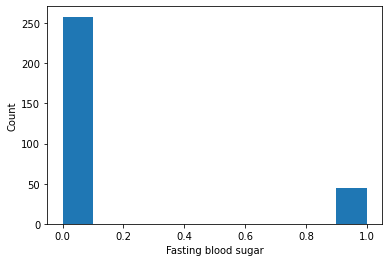

In [32]:
plt.hist(heart_data.fasting_blood_sugar)
plt.xlabel('Fasting blood sugar')
plt.ylabel('Count')
plt.show()

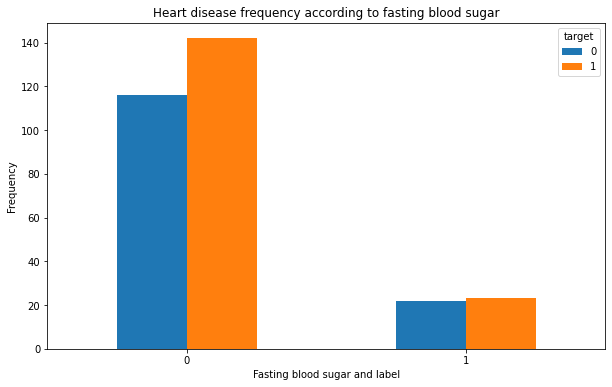

In [33]:
pd.crosstab(heart_data.fasting_blood_sugar, heart_data.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency according to fasting blood sugar')
plt.xlabel('Fasting blood sugar and label')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

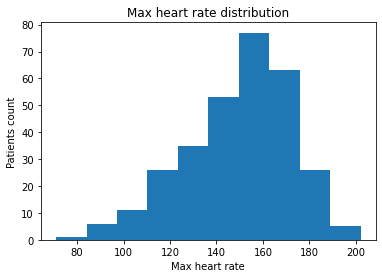

In [34]:
plt.hist(heart_data['max_heart_rate_achieved'])
plt.xlabel('Max heart rate')
plt.ylabel('Patients count')
plt.title('Max heart rate distribution')
plt.show()

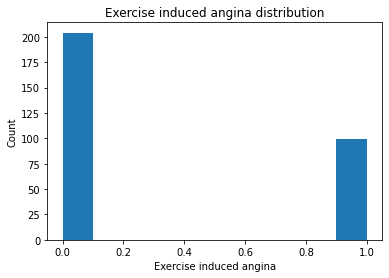

In [35]:
plt.hist(heart_data['exercise_induced_angina'])
plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.title('Exercise induced angina distribution')
plt.show()

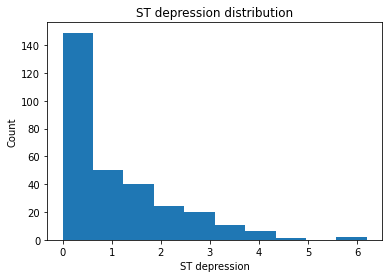

In [36]:
plt.hist(heart_data['st_depression'])
plt.xlabel('ST depression')
plt.ylabel('Count')
plt.title('ST depression distribution')
plt.show()

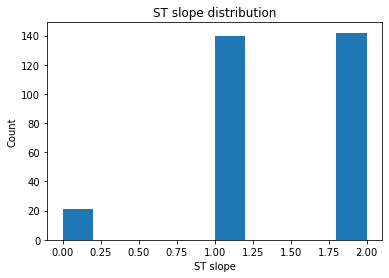

In [37]:
plt.hist(heart_data.st_slope)
plt.xlabel('ST slope')
plt.ylabel('Count')
plt.title('ST slope distribution')
plt.show()

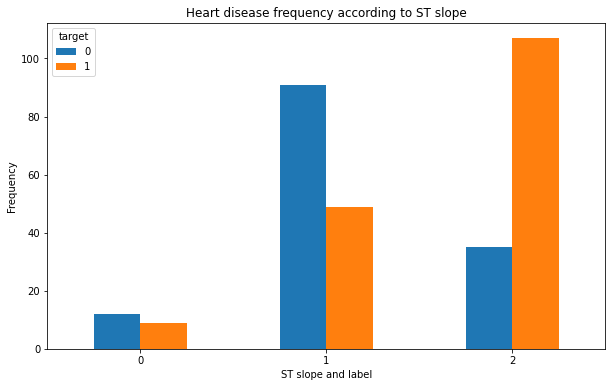

In [38]:
pd.crosstab(heart_data.st_slope, heart_data.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency according to ST slope')
plt.xlabel('ST slope and label')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

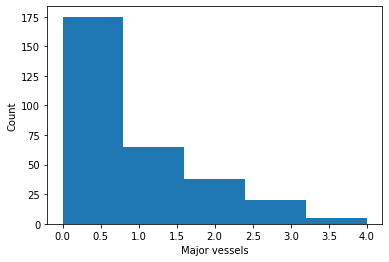

In [39]:
plt.hist(heart_data.major_vessels_count, bins=5)
plt.xlabel('Major vessels')
plt.ylabel('Count')
plt.show()

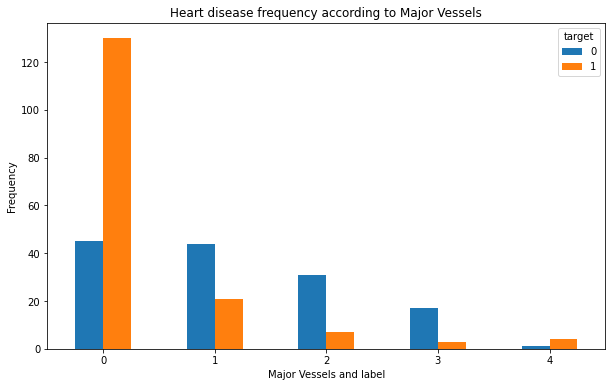

In [40]:
pd.crosstab(heart_data.major_vessels_count, heart_data.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency according to Major Vessels')
plt.xlabel('Major Vessels and label')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

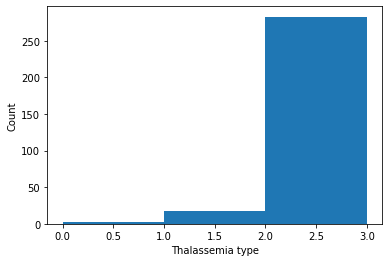

In [41]:
plt.hist(heart_data.thalassemia, bins = 3)
plt.xlabel('Thalassemia type')
plt.ylabel('Count')
plt.show()

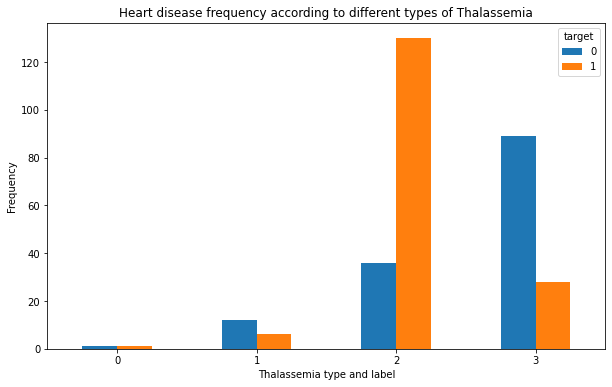

In [42]:
pd.crosstab(heart_data.thalassemia, heart_data.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency according to different types of Thalassemia')
plt.xlabel('Thalassemia type and label')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

### Data Preprocessing

In [43]:
heart_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Creating dummy variables of the categorical ones

In [44]:
cpt_dummy = pd.get_dummies(heart_data['chest_pain_type'], prefix = 'cp')
heart_data2 = pd.concat([heart_data, cpt_dummy], axis=1)
heart_data2.drop("chest_pain_type", axis = 1, inplace=True)
heart_data2.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thalassemia,target,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [45]:
thal_dummy = pd.get_dummies(heart_data['thalassemia'], prefix = 'thal')
heart_data2 = pd.concat([heart_data2, thal_dummy], axis=1)
heart_data2.drop("thalassemia", axis = 1, inplace = True)
heart_data2.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,0,1,0


In [46]:
st_slope_dummy = pd.get_dummies(heart_data['st_slope'], prefix = 'slp')
heart_data2 = pd.concat([heart_data2, st_slope_dummy], axis=1)
heart_data2.drop("st_slope", axis = 1, inplace = True)
heart_data2.head()


,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,major_vessels_count,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slp_0,slp_1,slp_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [47]:
#dropping the columns that won`t be used in the model
heart_data2.drop("target", axis = 1, inplace = True)
heart_data2.drop("cholesterol", axis = 1, inplace = True)
#heart_data2.drop("age", axis = 1, inplace = True)
heart_data2.drop("resting_blood_pressure", axis = 1, inplace = True)
heart_data2.head()

,age,sex,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,major_vessels_count,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slp_0,slp_1,slp_2
0,63,1,1,0,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,0,1,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,0,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,0,1,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1


##### Normalization

In [48]:
#normalizing the values to be between 0 and 1, because they are positive numbers
heart_data2['max_heart_rate_achieved'] = heart_data2['max_heart_rate_achieved'] / heart_data2['max_heart_rate_achieved'].max()
heart_data2['st_depression'] = heart_data2['st_depression'] / heart_data2['st_depression'].max()
heart_data2['major_vessels_count'] = heart_data2['major_vessels_count'] / heart_data2['major_vessels_count'].max()
heart_data2['age'] = heart_data2['age'] / heart_data2['age'].max()

In [49]:
heart_data2.head()

,age,sex,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,major_vessels_count,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slp_0,slp_1,slp_2
0,0.818182,1,1,0,0.742574,0,0.370968,0.0,0,0,0,1,0,1,0,0,1,0,0
1,0.480519,1,0,1,0.925743,0,0.564516,0.0,0,0,1,0,0,0,1,0,1,0,0
2,0.532468,0,0,0,0.851485,0,0.225806,0.0,0,1,0,0,0,0,1,0,0,0,1
3,0.727273,1,0,1,0.881188,0,0.129032,0.0,0,1,0,0,0,0,1,0,0,0,1
4,0.740260,0,0,1,0.806931,1,0.096774,0.0,1,0,0,0,0,0,1,0,0,0,1


### Logistic Regression model

In [50]:
x = heart_data2
y = heart_data['target']

In [51]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [52]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred) * 100,"%")

Accuracy score of the model is: 86.88524590163934 %


In [53]:
print(confusion_matrix(y_test, y_pred))

[[22  5]
 [ 3 31]]


In [54]:
#precision = True positive / True positive + False Positive
precision = 22 / 27
precision

0.8148148148148148

In [55]:
#recall = True positive / True Positive + False Negative
recall = 22 / 25
recall

0.88

In [56]:
#accuracy = True positive + True Negative / True Positive + True Negative + False Positive + False Negative
accuracy = 53 / 61
accuracy

0.8688524590163934

In [57]:
#specificity = True Negative / True Negative + False Positive
specificity = 31 / 36
specificity

0.8611111111111112

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>87 %</b>.
* It was right in <b>81 %</b> of the times a positive class was predicted.
* Recognized <b>88 %</b> of all positive, and <b>86 %</b> of all negative examples. 

### K-Nearest Neighbors Classifier 

In [58]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred1 = knn.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred1) * 100,"%")

Accuracy score of the model is: 86.88524590163934 %


In [59]:
print(confusion_matrix(y_test, y_pred1))

[[24  3]
 [ 5 29]]


In [60]:
#precision = True positive / True positive + False Positive
precision = 24 / 27
precision

0.8888888888888888

In [61]:
#recall = True positive / True Positive + False Negative
recall = 24 / 29
recall

0.8275862068965517

In [62]:
#specificity = True Negative / True Negative + False Positive
specificity = 29 / 32
specificity

0.90625

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>87 %</b>.
* It was right in <b>89 %</b> of the times a positive class was predicted.
* Recognized <b>83 %</b> of all positive, and <b>90 %</b> of all negative examples. 

### Support Vector Classifier

In [63]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred2 = svc.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred2) * 100,"%")

Accuracy score of the model is: 86.88524590163934 %


In [64]:
print(confusion_matrix(y_test, y_pred2))

[[23  4]
 [ 4 30]]


In [65]:
#precision = True positive / True positive + False Positive
precision = 23 / 27
precision

0.8518518518518519

In [66]:
#recall = True positive / True Positive + False Negative
recall = 23 / 27
recall

0.8518518518518519

In [67]:
#specificity = True Negative / True Negative + False Positive
specificity = 30 / 34
specificity

0.8823529411764706

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>87 %</b>.
* It was right in <b>85 %</b> of the times a positive class was predicted.
* Recognized <b>85 %</b> of all positive, and <b>88 %</b> of all negative examples. 

### Decision Tree Classifier

In [68]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred3 = dtc.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred3) * 100,"%")

Accuracy score of the model is: 86.88524590163934 %


In [69]:
print(confusion_matrix(y_test, y_pred3))

[[23  4]
 [ 4 30]]


In [70]:
#precision = True positive / True positive + False Positive
precision = 22 / 27
precision

0.8148148148148148

In [71]:
#recall = True positive / True Positive + False Negative
recall = 22 / 26
recall

0.8461538461538461

In [72]:
#specificity = True Negative / True Negative + False Positive
specificity = 30 / 35
specificity

0.8571428571428571

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>85 %</b>.
* It was right in <b>81 %</b> of the times a positive class was predicted.
* Recognized <b>85 %</b> of all positive, and <b>86 %</b> of all negative examples. 

### Random Forest Classifier

In [73]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)
y_pred4 = rfc.predict(x_test)

print("Accuracy score of the model is:",accuracy_score(y_test, y_pred4) * 100,"%")

Accuracy score of the model is: 88.52459016393442 %


In [74]:
print(confusion_matrix(y_test, y_pred4))

[[23  4]
 [ 3 31]]


In [75]:
#precision = True positive / True positive + False Positive
precision = 22 / 27
precision

0.8148148148148148

In [76]:
#recall = True positive / True Positive + False Negative
recall = 22 / 25
recall

0.88

In [77]:
#specificity = True Negative / True Negative + False Positive
specificity = 31 / 36
specificity

0.8611111111111112

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>85 %</b>.
* It was right in <b>81 %</b> of the times a positive class was predicted.
* Recognized <b>88 %</b> of all positive, and <b>86 %</b> of all negative examples. 

### Classification Report and Summary

Algorithm     | Accuracy  | Precision | Recall | Specificity |
------------- | --------- | ------    | -----  | -----|
LR            | 87        | 81        | 88     | 86
KNN           | 87      | 89        | 83     | 90
SVM           | 87      | 85       | 85     | 88
DTC           | 85        | 81        | 85     | 86
RFC           | 85        | 81        | 88     | 86

It looks like we have a close decision between Logistic Regression and KNearestNeighbor classifiers. KNN has better precision and specificity scores, while LR has better recall, and most importantly it got a smaller number of False Negative results.

Heart disease is a serious condition and missclassifying a patient with the disease holds a great risk. That is why in that case, Logistic Regression is probably the best model for classification.

### K Means Clustering of the positive examples

In [78]:
positive_patients = heart_data[(heart_data['target'] == 1)]

In [79]:
len(positive_patients)

165

In [80]:
positive_patients.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EDA

In [81]:
positive_patients.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels_count,thalassemia,target
age,1.000000,-0.190231,0.024934,0.274698,0.257154,0.155415,-0.084360,-0.525801,0.046990,0.174594,-0.109380,0.117463,0.080959,NaN
sex,-0.190231,1.000000,0.039321,0.030943,-0.239287,0.142416,0.018542,0.204315,0.071849,0.032630,0.015768,0.060384,0.229687,NaN
chest_pain_type,0.024934,0.039321,1.000000,0.185422,-0.044993,0.227776,-0.073879,0.064143,-0.104002,0.207949,-0.127548,0.101492,0.047912,NaN
resting_blood_pressure,0.274698,0.030943,0.185422,1.000000,0.093291,0.136800,-0.102860,0.028039,-0.045556,0.181501,-0.008066,0.051005,-0.013813,NaN
cholesterol,0.257154,-0.239287,-0.044993,0.093291,1.000000,-0.017795,-0.206730,0.014455,-0.011896,0.057718,0.044581,-0.029081,0.081992,NaN
fasting_blood_sugar,0.155415,0.142416,0.227776,0.136800,-0.017795,1.000000,-0.057736,-0.028132,-0.060931,-0.004714,-0.019531,0.095860,0.083362,NaN
rest_ecg,-0.084360,0.018542,-0.073879,-0.102860,-0.206730,-0.057736,1.000000,0.031035,-0.092503,-0.087215,0.138237,0.133233,0.106879,NaN
max_heart_rate_achieved,-0.525801,0.204315,0.064143,0.028039,0.014455,-0.028132,0.031035,1.000000,-0.173675,-0.182040,0.223528,-0.042331,0.040057,NaN
exercise_induced_angina,0.046990,0.071849,-0.104002,-0.045556,-0.011896,-0.060931,-0.092503,-0.173675,1.000000,0.033505,-0.049097,-0.069545,0.083362,NaN
st_depression,0.174594,0.032630,0.207949,0.181501,0.057718,-0.004714,-0.087215,-0.182040,0.033505,1.000000,-0.476775,-0.075280,0.024138,NaN


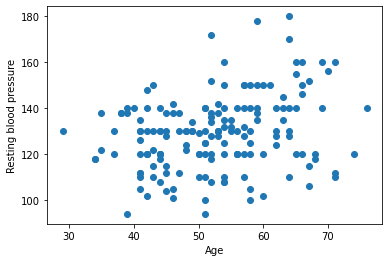

In [82]:
plt.scatter(positive_patients['age'], positive_patients['resting_blood_pressure'])
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
plt.show()

In [83]:
pearson_coef, p_value = stats.pearsonr(positive_patients['age'], positive_patients['resting_blood_pressure'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2746976958851346  with a P-value of P = 0.0003560678811288467


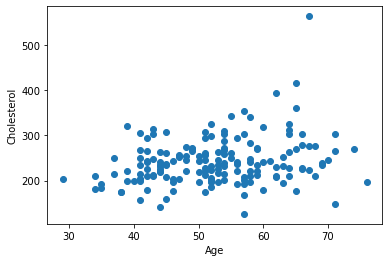

In [84]:
plt.scatter(positive_patients['age'], positive_patients['cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

In [85]:
pearson_coef, p_value = stats.pearsonr(positive_patients['age'], positive_patients['cholesterol'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2571537656848685  with a P-value of P = 0.0008550126059718955


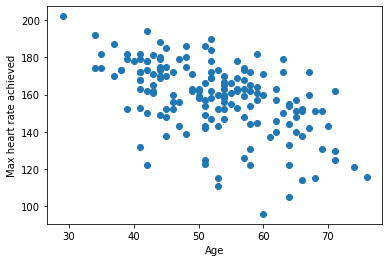

In [86]:
plt.scatter(positive_patients['age'], positive_patients['max_heart_rate_achieved'])
plt.xlabel('Age')
plt.ylabel('Max heart rate achieved')
plt.show()

In [87]:
pearson_coef, p_value = stats.pearsonr(positive_patients['age'], positive_patients['max_heart_rate_achieved'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5258007358642253  with a P-value of P = 4.107759226144909e-13


<h5>Conclusion:</h5>
All three correlations appear statistically significant, but the linear relationships between 'age' and 'cholesterol' and 'age' and 'resting_blood_pressure' are small. Thats why I will use 'age' and 'max_heart_rate_achieved' for the K Means clustering algorithm, as their correlation coefficient indicates a moderate negative linear relationship.

### Preprocessing

In [88]:
x_kmeans = positive_patients.copy()

In [89]:
x_kmeans.drop("target", axis = 1, inplace = True)
x_kmeans.drop("cholesterol", axis = 1, inplace = True)
x_kmeans.drop("chest_pain_type", axis = 1, inplace = True)
x_kmeans.drop("resting_blood_pressure", axis = 1, inplace = True)
x_kmeans.drop("sex", axis = 1, inplace = True)
x_kmeans.drop("exercise_induced_angina", axis = 1, inplace = True)
x_kmeans.drop("st_depression", axis = 1, inplace = True)
x_kmeans.drop("st_slope", axis = 1, inplace = True)
x_kmeans.drop("major_vessels_count", axis = 1, inplace = True)
x_kmeans.drop("thalassemia", axis = 1, inplace = True)
x_kmeans.drop("rest_ecg", axis = 1, inplace = True)
x_kmeans.drop("fasting_blood_sugar", axis = 1, inplace = True)
x_kmeans.head()

,age,max_heart_rate_achieved
0,63,150
1,37,187
2,41,172
3,56,178
4,57,163


In [90]:
x_kmeans['max_heart_rate_achieved'] = x_kmeans['max_heart_rate_achieved'] / x_kmeans['max_heart_rate_achieved'].max()
x_kmeans['age'] = x_kmeans['age'] / x_kmeans['age'].max()
x_kmeans.head()

,age,max_heart_rate_achieved
0,0.828947,0.742574
1,0.486842,0.925743
2,0.539474,0.851485
3,0.736842,0.881188
4,0.750000,0.806931


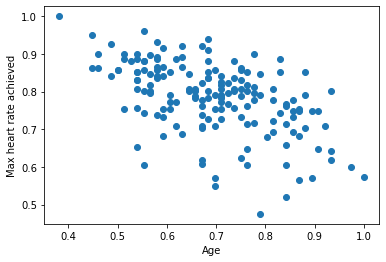

In [91]:
plt.scatter(x_kmeans['age'], x_kmeans['max_heart_rate_achieved'])
plt.xlabel('Age')
plt.ylabel('Max heart rate achieved')
plt.show()

### Clustering

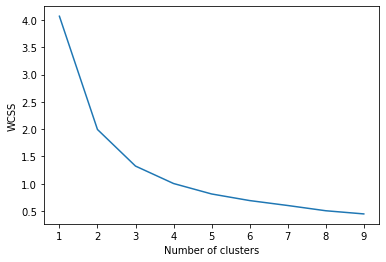

In [92]:
#using the elbow method to see the most suitable number of clusters
wcss =[]
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_kmeans)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
#KMeans Clustering with K = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_kmeans)

KMeans(n_clusters=3)

In [94]:
#Results
clusters = x_kmeans.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x_kmeans)

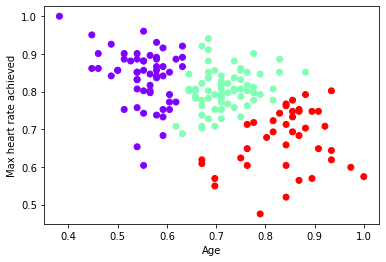

In [95]:
plt.scatter(clusters['age'],clusters['max_heart_rate_achieved'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Max heart rate achieved')
plt.show()

In [96]:
#KMeans Clustering with K = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_kmeans)

KMeans(n_clusters=2)

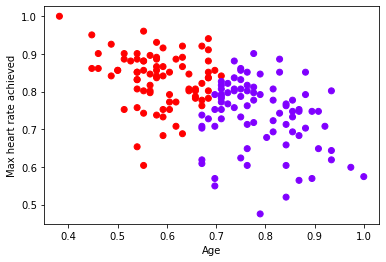

In [97]:
#Results
clusters1 = x_kmeans.copy()
clusters1['cluster_pred'] = kmeans.fit_predict(x_kmeans)

plt.scatter(clusters1['age'],clusters1['max_heart_rate_achieved'],c=clusters1['cluster_pred'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Max heart rate achieved')
plt.show()

### Clustering Conclusion

After clustering the positive patients, we can make the following conclusions. Patients that are younger than 55 years tend to have abnormally high max heart rate, while older patients don`t. This could mean that other features are more indicative of a heart disease when observing older people, whereas with younger patients, a high max heart rate is definitely disturbing.

### References

* https://www.kaggle.com/shubhamjha1901/heartdisease-logisticregressionmodel
* https://www.kaggle.com/anshigupta01/heart-disease-classification
* https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124
* https://www.bhf.org.uk/informationsupport/risk-factors
* https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack
* https://litfl.com/st-segment-ecg-library/
* https://www.getbodysmart.com/heart-anatomy/major-blood-vessels-heart
* https://www.healthline.com/health/thalassemia
* https://www.symbolab.com/solver/complex-numbers-calculator/6.678692115314504e-07